Ссылка на github репозиторий: \
https://github.com/AndrosovDima/dataviz

Сколнируем репозиторий, чтобы иметь возможность читать файл с деревом оттуда

In [1]:
! git clone https://github.com/AndrosovDima/dataviz

fatal: destination path 'dataviz' already exists and is not an empty directory.


Рассматриваем бинарное дерево!

In [12]:
import networkx as nx
G = nx.read_graphml('dataviz/hw_1/tree.xml') # считываем граф из файла

Создадим список смежности, которым задается дерево

In [13]:
adj_list = nx.dfs_successors(G)
adj_list

{'n0': ['n1', 'n10'],
 'n1': ['n2', 'n5'],
 'n10': ['n11', 'n13'],
 'n11': ['n12'],
 'n13': ['n14', 'n15'],
 'n2': ['n3', 'n4'],
 'n5': ['n6'],
 'n6': ['n7'],
 'n7': ['n8', 'n9']}

Функция поиска корня дерева

In [14]:
def find_root(adj_list):
  for x in adj_list.keys():
    cnt = 0
    for v in adj_list.keys():
      cnt += adj_list[v].count(x)
    if cnt == 0:
      return x
root = find_root(adj_list)
root

'n0'

# Реализуем HV алгоритм отрисовки бинарного дерева

In [15]:
# глобальные переменные - словари координат
x = dict() 
y = dict()

In [16]:
from math import inf

In [17]:
for node in G.nodes():
  x[node] = inf
  y[node] = inf
x[root] = 0
y[root] = 0

In [18]:
def get_children(adj_list, node):
  if node not in adj_list.keys() or len(adj_list[node]) == 0:
    return []
  else:
    return adj_list[node]

In [19]:
def H_V_algo(graph, parent):
  global x, y
  adj_list = nx.dfs_successors(graph)
  children = get_children(adj_list, parent)
  if len(children) == 0:
    return x[parent]
  elif len(children) == 1:
    child = children[0]
    x[child] = x[parent] + 1
    y[child] = y[parent]
    return H_V_algo(graph, child)
  else:
    left_child = children[0]
    right_child = children[1]
    x[left_child] = x[parent]
    y[left_child] = y[parent] - 1
    x[right_child] = H_V_algo(graph, left_child) + 1
    y[right_child] = y[parent]
    return H_V_algo(graph, right_child)

In [20]:
H_V_algo(graph=G, parent=root)
None

Отрисовка графа + сохранение картинки в формате png \
Картинка сохраняется автоматически в папку content на google colab \
Картинка с прочитанным с гитхаба деревом также залита на гитхаб

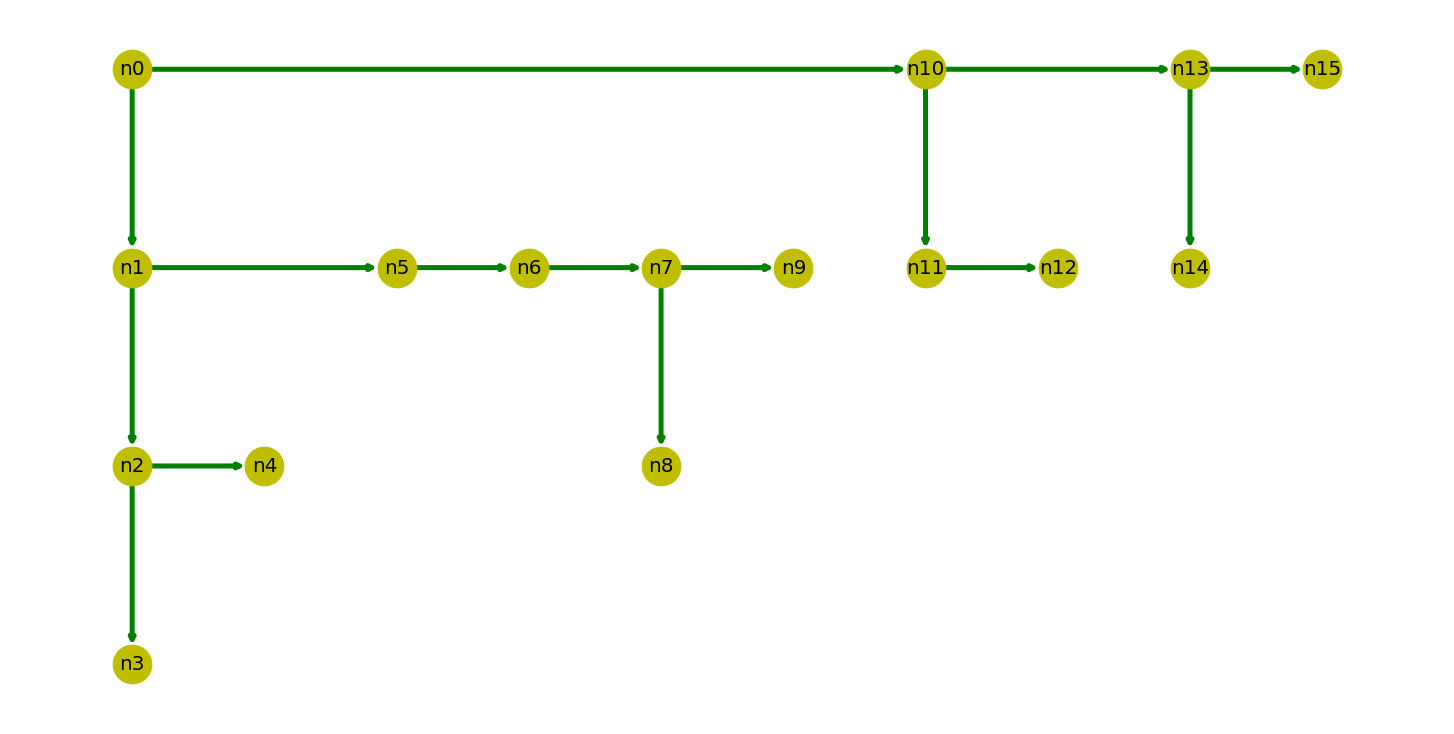

In [21]:
import matplotlib.pyplot as plt
coordinates = dict()
for node in G.nodes():
  coordinates[node] = (x[node], y[node])
plt.figure(figsize=(20, 10))
nx.draw(G, pos=coordinates, with_labels=True, node_size=1500, font_size=20, node_color='y', width=5, edge_color='g')
plt.savefig('hv_tree.png')
plt.show()
